In [1]:
import imageio as iio
import numpy as np 
import matplotlib.pyplot as plt

data = np.average(iio.imread('sun.jpg'), axis=-1)
# data = np.average(iio.imread('moon.png'), axis=-1)

432 149


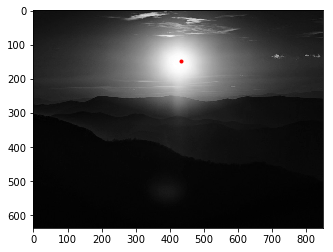

In [2]:
# Find the highest value in the array, not robust, randomly pick if multiple are equal
im = plt.imshow(data, cmap='gray')
x, y = np.unravel_index(data.argmax(), data.shape)
plt.plot([y], [x], marker='o', markersize=3, color="red")

print(y, x)
plt.show()

424 228


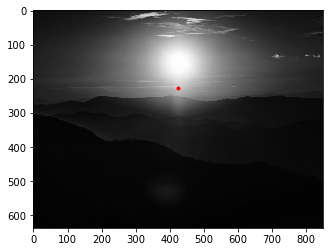

In [3]:
# Find the barycenter of intensity, not robust unless clear distinction between background and foreground
im = plt.imshow(data, cmap='gray')
tmp_data = data.copy()
tmp_data /= np.max(tmp_data)
pos = np.where(data)
x = int(np.average(pos[0], weights=data[pos]))
y = int(np.average(pos[1], weights=data[pos]))
plt.plot([y], [x], marker='o', markersize=3, color="red")

print(y, x)
plt.show()

425 156


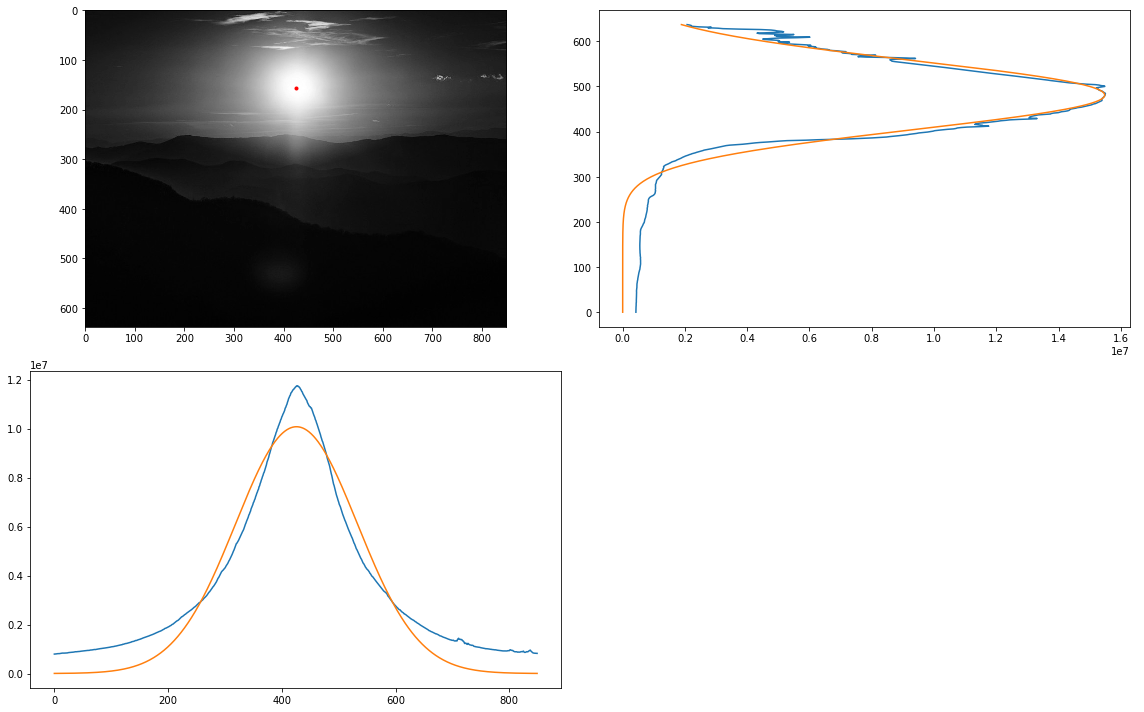

In [10]:
# Generate a graph of intensities in X and Y (squared) and fit a gaussian curve to find the highest value
# Only working for really bright stuff

from scipy import optimize

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

data = data.astype(float)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
im = axs[0,0].imshow(data, cmap='gray')
axs[-1, -1].axis('off')

x_ = np.arange(data.shape[0])
# func_ = np.log(np.max(data, axis=1))
func_ = np.sum(data**2, axis=1)
axs[0,1].plot(func_, x_[::-1])
coeff_1, _ = optimize.curve_fit(gauss, x_, func_, p0=[1., 0., 1.])
axs[0,1].plot(gauss(x_, *coeff_1), x_[::-1])

x_ = np.arange(data.shape[1])
# func_ = np.log(np.max(data, axis=0))
func_ = np.sum(data**2, axis=0)
axs[1,0].plot(x_, func_)
coeff_2, _ = optimize.curve_fit(gauss, x_, func_, p0=[1., 0., 1.])
axs[1,0].plot(x_, gauss(x_, *coeff_2))

x, y = int(coeff_1[1]), int(coeff_2[1])
axs[0,0].plot([y], [x], marker='o', markersize=3, color="red")
fig.tight_layout()
print(y, x)
plt.show()

425 151


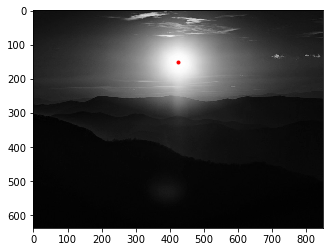

In [5]:
# Simplest, if somewhat bright the image can be thresholded and barrycenter of mask is found

im = plt.imshow(data, cmap='gray')
tmp_data = data.copy()
tmp_data[data < 150] = 0

x, y = np.average(np.argwhere(tmp_data), axis=0).astype(int)
plt.plot([y], [x], marker='o', markersize=3, color="red")

print(y, x)
plt.show()

Optimization terminated successfully.
         Current function value: -540896.000000
         Iterations: 63
         Function evaluations: 140
427 157


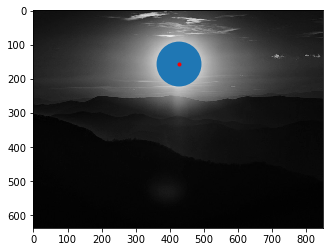

In [6]:
# Using an estimation of center (previous), fit a 2D circle to the mask

from skimage import io, color, measure, draw, img_as_bool
import numpy as np

tmp_data = data.copy()
tmp_data[data < 200] = 0
tmp_data = img_as_bool(tmp_data)

def cost(params):
    x0, y0, r = params
    coords = draw.disk((x0, y0), r, shape=tmp_data.shape)
    template = np.zeros_like(tmp_data)
    template[coords] = 1
    return -np.sum(template == tmp_data)

init_x, init_y = np.average(np.argwhere(tmp_data), axis=0)
x, y, r = optimize.fmin(cost, (init_x, init_y, 50))

x, y = int(x), int(y)
f, ax = plt.subplots()
circle = plt.Circle((y, x), r)
ax.imshow(data, cmap='gray')
ax.add_artist(circle)
ax.plot([y], [x], marker='o', markersize=3, color="red")

print(y, x)
plt.show()